**The Sparks Foundation**

**Intern Name - Prajwal Gawande** 

**Data Science and Business Analytics**

**Task 1 : Prediction Using Supervised ML**

Data Source: http://bit.ly/w-data

**Problem Statement : To predict the percentage of a student based on the number of study hours**

Importing the required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
#Reading data from the remote link
data_url = 'http://bit.ly/w-data'
dataset = pd.read_csv(data_url)
print(dataset)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


Importing the dataset

Visualize the data

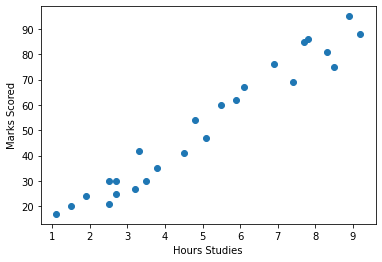

In [3]:
plt.scatter(dataset['Hours'],dataset['Scores'])
plt.xlabel('Hours Studies')
plt.ylabel('Marks Scored')
plt.show()

From the graph we can clearly see that number of hours studied is directly proportional to the marks scored. If number of study hours increase, the marks scored increases too.

Splitting the data into x and y

In [5]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [6]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [7]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

**Splitting the data into training and test datasets**

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=101)

In [10]:
x_train

array([[1.1],
       [6.1],
       [2.5],
       [4.5],
       [1.5],
       [6.9],
       [2.7],
       [3.5],
       [8.3],
       [3.3],
       [2.7],
       [8.9],
       [7.8],
       [9.2],
       [1.9],
       [5.9]])

In [11]:
x_test

array([[2.5],
       [7.7],
       [3.8],
       [7.4],
       [5.5],
       [4.8],
       [3.2],
       [8.5],
       [5.1]])

In [12]:
y_train

array([17, 67, 21, 41, 20, 76, 30, 30, 81, 42, 25, 95, 86, 88, 24, 62],
      dtype=int64)

In [13]:
y_test

array([30, 85, 35, 69, 60, 54, 27, 75, 47], dtype=int64)

Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

Training the model using fit function

In [15]:
LR.fit(x_train,y_train)
print("Training complete")

Training complete


Plotting the Regression Line

In [16]:
line = LR.coef_*x+LR.intercept_

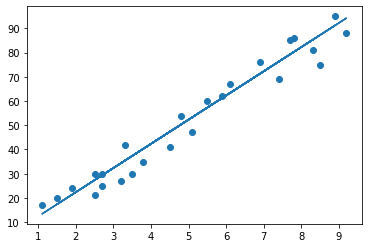

In [17]:
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

Predicting on x_test

In [18]:
y_pred_LR=LR.predict(x_test)

In [19]:
x_test

array([[2.5],
       [7.7],
       [3.8],
       [7.4],
       [5.5],
       [4.8],
       [3.2],
       [8.5],
       [5.1]])

In [20]:
y_test

array([30, 85, 35, 69, 60, 54, 27, 75, 47], dtype=int64)

In [21]:
y_pred_LR

array([27.35418824, 79.25993656, 40.33062532, 76.26537416, 57.29981227,
       50.3125    , 34.34150052, 87.2454363 , 53.3070624 ])

Difference between the actual data and predicted data

In [22]:
diff_LR=y_test-y_pred_LR

In [23]:
res_df=pd.concat([pd.Series(y_pred_LR),pd.Series(y_test),pd.Series(diff_LR)],axis=1)
res_df.columns=['Predicted score','Original score','Difference']

In [24]:
res_df

,Predicted score,Original score,Difference
0,27.354188,30,2.645812
1,79.259937,85,5.740063
2,40.330625,35,-5.330625
3,76.265374,69,-7.265374
4,57.299812,60,2.700188
5,50.312500,54,3.687500
6,34.341501,27,-7.341501
7,87.245436,75,-12.245436
8,53.307062,47,-6.307062


Testing with my own input data

In [25]:
hours = [[9.25]]
own_pred = LR.predict(hours)
print("Number of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

Number of Hours = [[9.25]]
Predicted Score = 94.7318423096841


In [26]:
from sklearn import metrics
print('Mean Absolute Error:',
      metrics.mean_absolute_error(y_test,y_pred_LR))

Mean Absolute Error: 5.918173514011163
